Loading the data and attaching it to make it easy to use.
##### Note
After transforming `LungCapData.txt` to  `LungCapData.csv` r no longer consider smoke,caesarean and gender column type as factor.So we use as.factor to turn them to factors. 

In [1]:
lungCapData <- read.table("../Data/LungCapData.csv", header = TRUE, sep = ",")
lungCapData$Smoke <- as.factor(lungCapData$Smoke)
lungCapData$Caesarean <- as.factor(lungCapData$Caesarean)
lungCapData$Gender <- as.factor(lungCapData$Gender)
attach(lungCapData)

Exploring the data 

1. First of all printing the columns names.
2. Second printing the columns types for `Age` and `Smoke`.
3. Printing the levels for `Smoke` column (possible values).

In [2]:
names(lungCapData)
class(Age)
class(Smoke)
levels(Smoke)

[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

[1] "integer"

[1] "factor"

[1] "no"  "yes"

Fitting a linear model to the data with the features Age and height as features and LungCap as output y.

LungCap=theta_0\*Age+ theta_1*height + theta_2

In [4]:
model1 <- lm(LungCap ~ Age + Height, data = lungCapData)

Displaying a summary of the model, including coefficients, standard errors, p-values, and R-squared value.

In [5]:
summary(model1)


Call:
lm(formula = LungCap ~ Age + Height, data = lungCapData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4080 -0.7097 -0.0078  0.7167  3.1679 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.747065   0.476899 -24.632  < 2e-16 ***
Age           0.126368   0.017851   7.079 3.45e-12 ***
Height        0.278432   0.009926  28.051  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 722 degrees of freedom
Multiple R-squared:  0.843,	Adjusted R-squared:  0.8425 
F-statistic:  1938 on 2 and 722 DF,  p-value: < 2.2e-16


From above model we can deduce these results:

1. First of residuals roughly lies between **-0.7** and **0.7** that means the predictions are close the label data.
2. Second the y_intercept/theta_2 is equal on average to **-11.747** this is the value of `LungCap` when both age and height is zero.
3. theta_1 is equal on average  to **0.126** meaning the `LungCap` will increase by **0.126** in respect of age.
4. theta_2 is equal on average  to **0.278** meaning the `LungCap` will increase by **0.278** in respect of height.

Calculating the correlation(pearson) between the age and height

In [ ]:
cor(Age, Height, method="pearson")

[1] 0.8357368

As we can see the correlation is strong positive between the height and age

Calculating the confidence interval for **height**,**age**,**y_intercept** with confidence level 95%

In [ ]:
confint(model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),-12.68333877,-10.8107918
Age,0.09132215,0.1614142
Height,0.25894454,0.2979192


we can confirm the previous results by the summary.

Fitting another model but this time around we include the gender , smoke and caesarean features.

In [ ]:
model2 <- lm(LungCap ~ Age + Height + Smoke + Gender + Caesarean, data = LungCapData)

Summarize the model2 results

In [ ]:
summary(model2)


Call:
lm(formula = LungCap ~ Age + Height + Smoke + Gender + Caesarean, 
    data = LungCapData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3388 -0.7200  0.0444  0.7093  3.0172 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -11.32249    0.47097 -24.041  < 2e-16 ***
Age            0.16053    0.01801   8.915  < 2e-16 ***
Height         0.26411    0.01006  26.248  < 2e-16 ***
Smokeyes      -0.60956    0.12598  -4.839 1.60e-06 ***
Gendermale     0.38701    0.07966   4.858 1.45e-06 ***
Caesareanyes  -0.21422    0.09074  -2.361   0.0185 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.02 on 719 degrees of freedom
Multiple R-squared:  0.8542,	Adjusted R-squared:  0.8532 
F-statistic: 842.8 on 5 and 719 DF,  p-value: < 2.2e-16


Additional insights from Model 2 (incorporating Smoke, Gender, Caesarean):

1. Smokers have a predicted decrease of **-0.61** in LungCap compared to non-smokers.
2. Males have a predicted increase of 0.39 in LungCap compared to females.
3. Having a Caesarean has a predicted decrease of -0.21 in LungCap compared to natural birth.
4. For the residual error model 1 and 2 are very similar **1.056** and **1.02**.

Plotting the model2

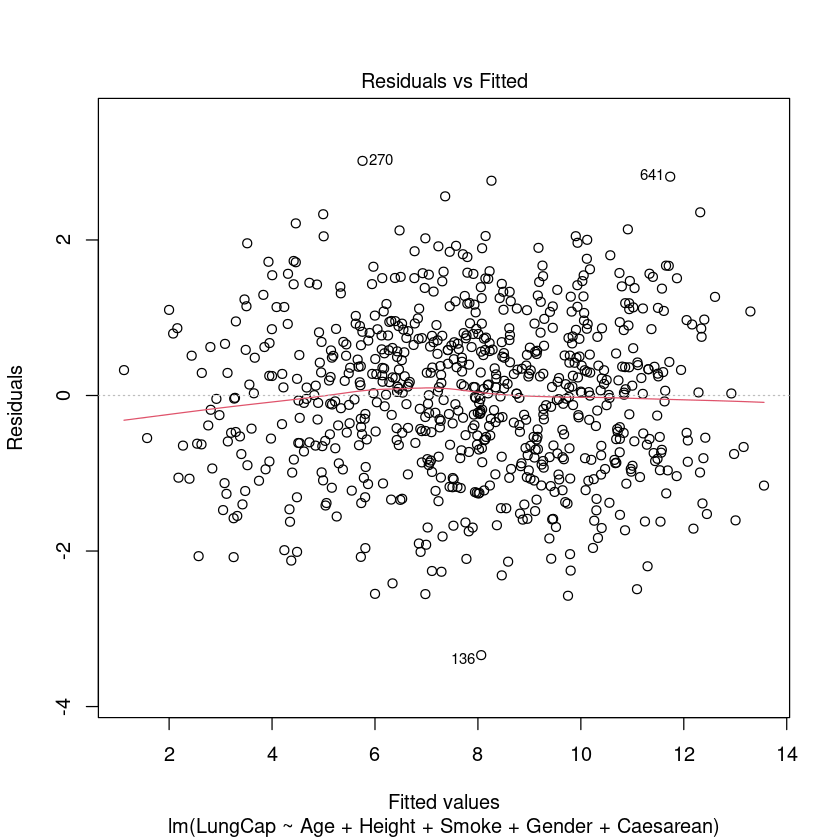

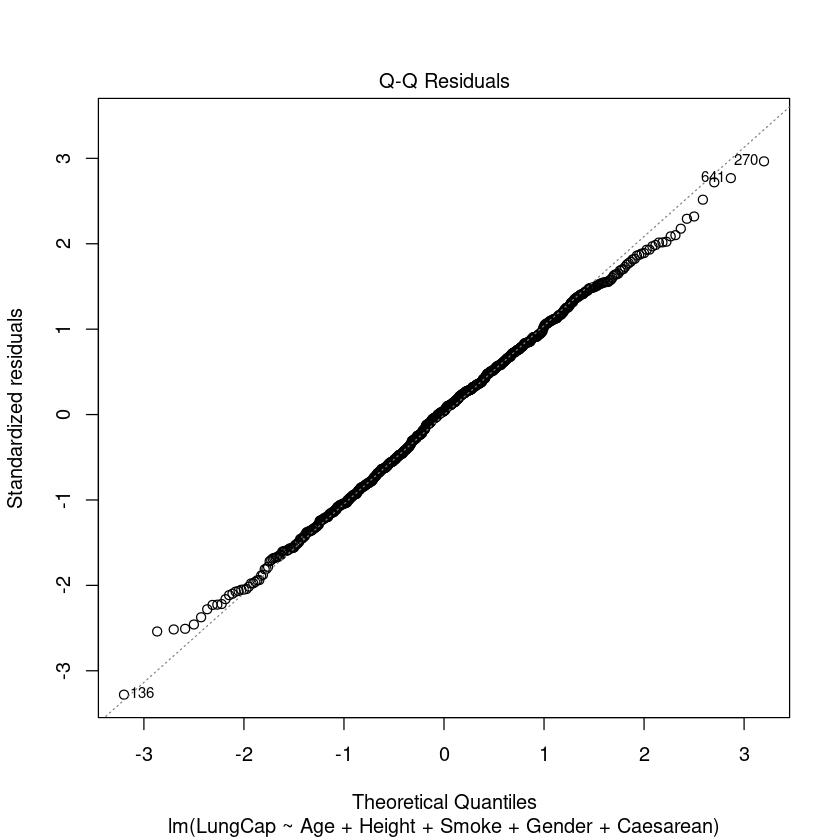

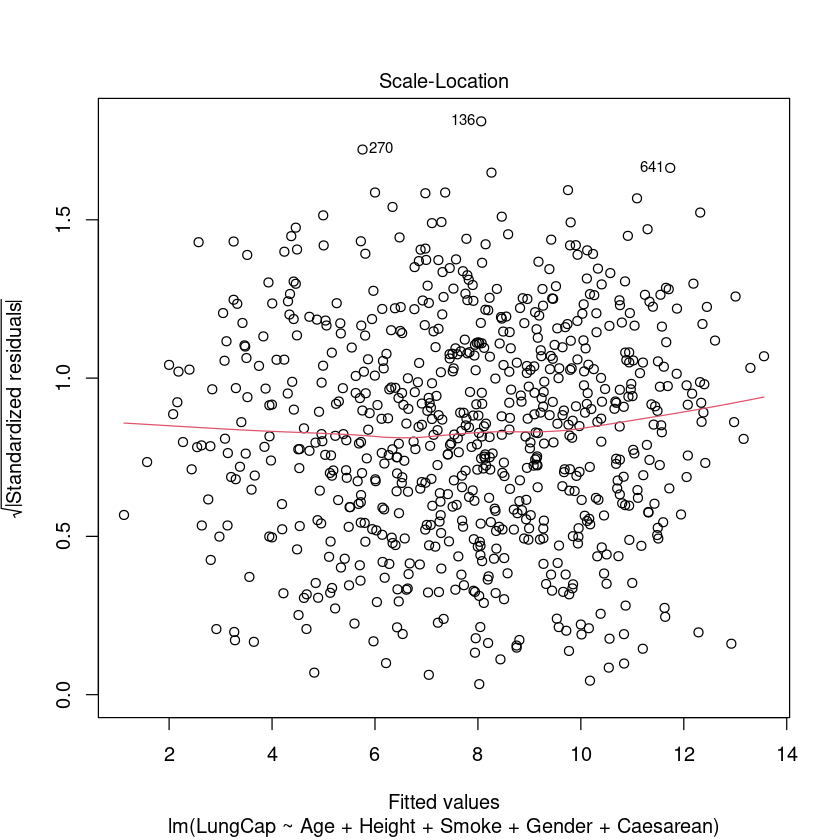

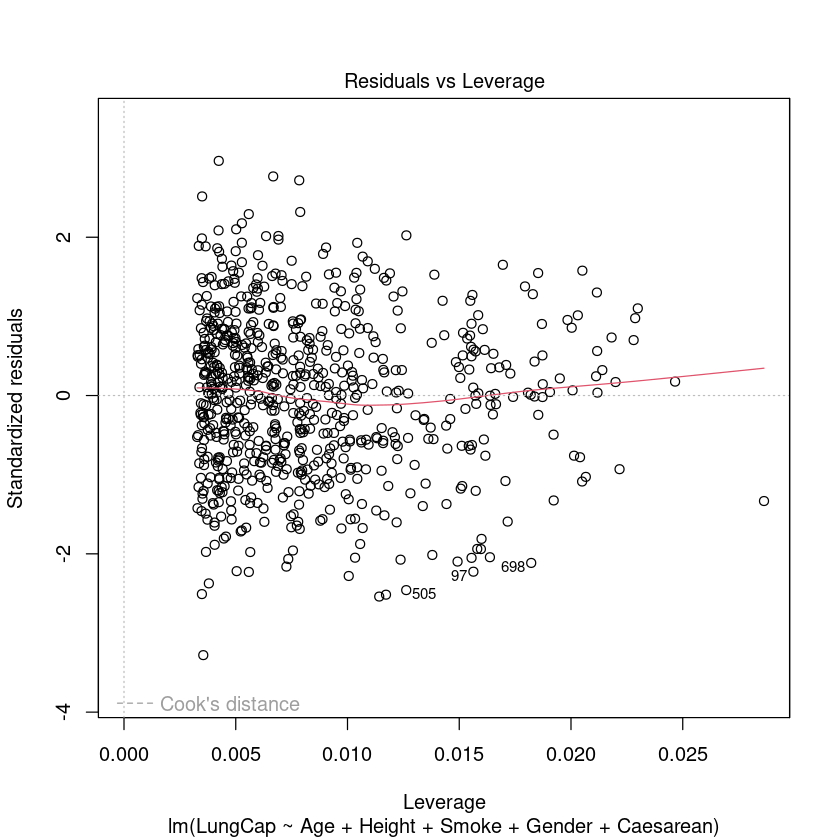

In [ ]:
plot(model2)